In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
import git
import os

# Get git repository root
repo = git.Repo(".", search_parent_directories = True)
# Update notebook working dir to repository root
os.chdir(repo.working_tree_dir)

# Load frequently used methods
with open("notebooks/methods.py", "r") as file:
    exec(file.read())

# EMG data filtering

In [2]:
samples = pd.read_csv("sample_sheet.csv")
sample = samples.iloc[0]
samples

,SID,AnimalID,CellName,Region,Date,Depth,Count,Location,Cortex,Layer
0,W1_C1,W1,C1,S1_L23,2019 12 09,177.265396,180,W1/C1,S1,L23
1,W1_C2,W1,C2,S1_L23,2019 12 09,265.898093,270,W1/C2,S1,L23
2,W1_C8,W1,C8,S1_L23,2019 12 10,315.138481,320,W1/C8,S1,L23
3,W2_C3,W2,C3,S1_L23,2019 12 12,236.353861,240,W2/C3,S1,L23
4,W2_C4,W2,C4,S1_L23,2019 12 12,285.594248,290,W2/C4,S1,L23
5,W2_C5,W2,C5,S1_L23,2019 12 12,408.695218,415,W2/C5,S1,L23
6,W2_C6,W2,C6,S1_L23,2019 12 12,196.961551,200,W2/C6,S1,L23
7,W3_C10,W3,C10,S1_L23,2019 12 18,364.378869,370,W3/C10,S1,L23
8,W3_C11,W3,C11,S1_L23,2019 12 18,226.505783,230,W3/C11,S1,L23
9,W4_C10,W4,C10,S1_L23,2019 12 18,206.809628,210,W4/C10,S1,L23


In [3]:
raw = pd.read_pickle(f"output/movement-s1-m1/{sample['AnimalID']}/{sample['CellName']}/emg/raw.pkl")
channels = raw.ch_names
sfreq = raw.info["sfreq"]

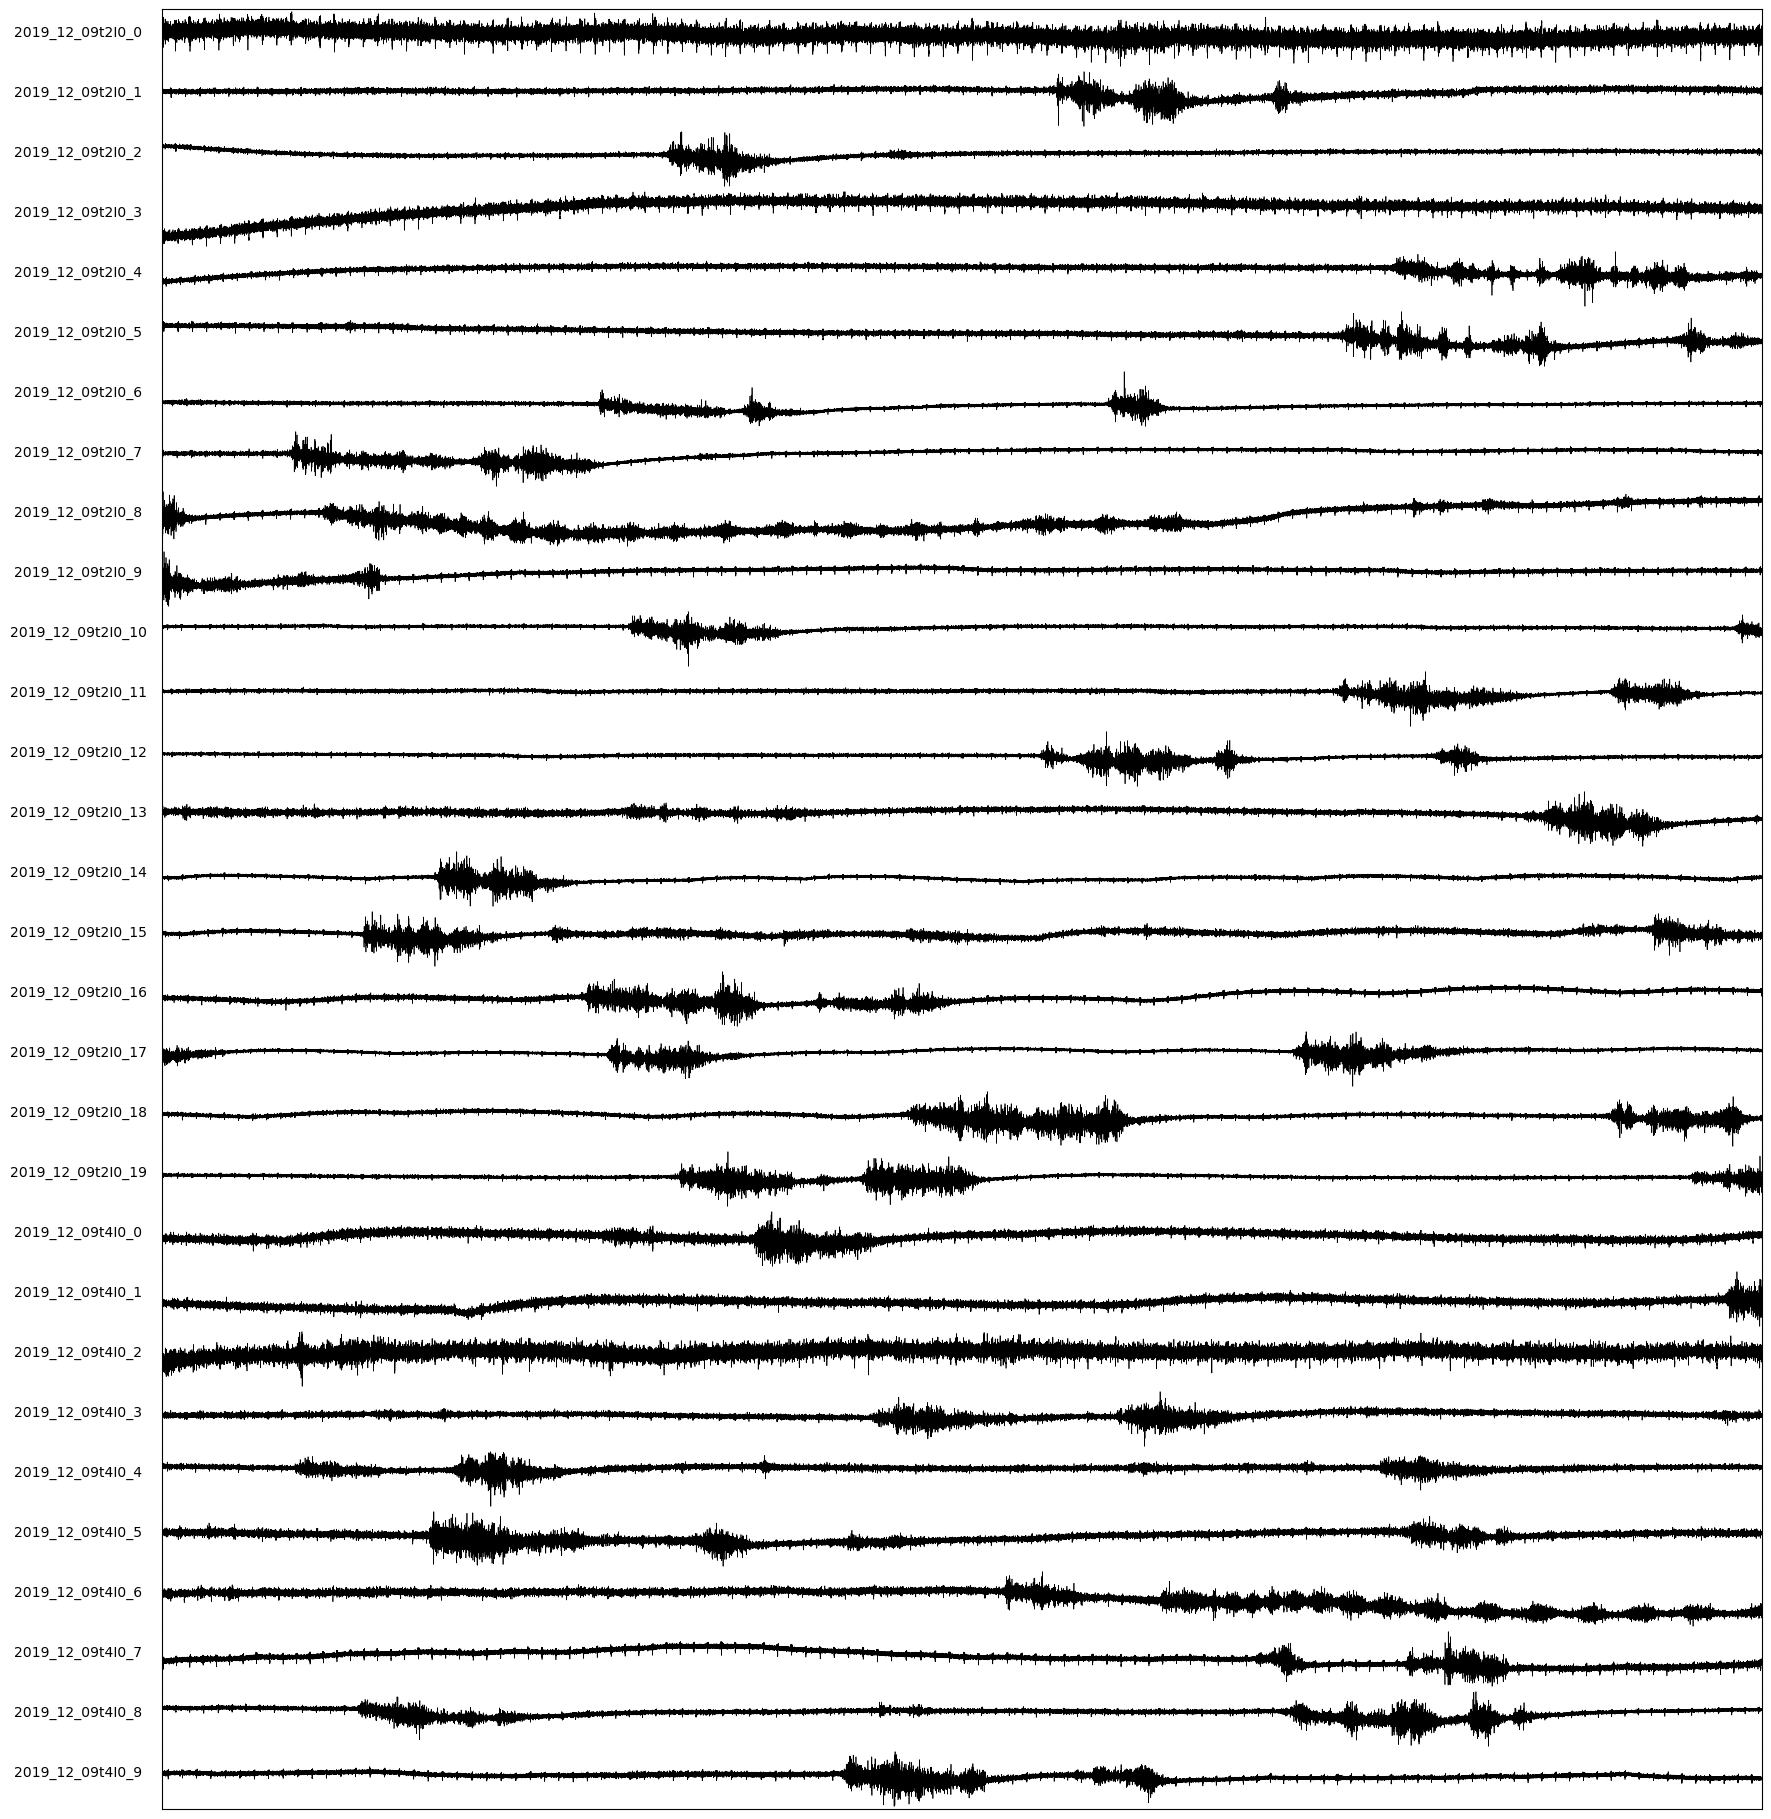

In [4]:
plot_channels(data = raw.get_data().T, time = raw.times, channels = channels, limit = None)

In [5]:
l_freq = 500
h_freq = 1000

raw.filter(l_freq = l_freq, h_freq = h_freq, fir_design = "firwin", picks = "emg")

No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5e+02 - 1e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 500.00
- Lower transition bandwidth: 125.00 Hz (-6 dB cutoff frequency: 437.50 Hz)
- Upper passband edge: 1000.00 Hz
- Upper transition bandwidth: 250.00 Hz (-6 dB cutoff frequency: 1125.00 Hz)
- Filter length: 529 samples (0.026 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawArray | 30 x 200001 (10.0 s), ~45.8 MB, data loaded>

## Filtered data (plot non-scaled)

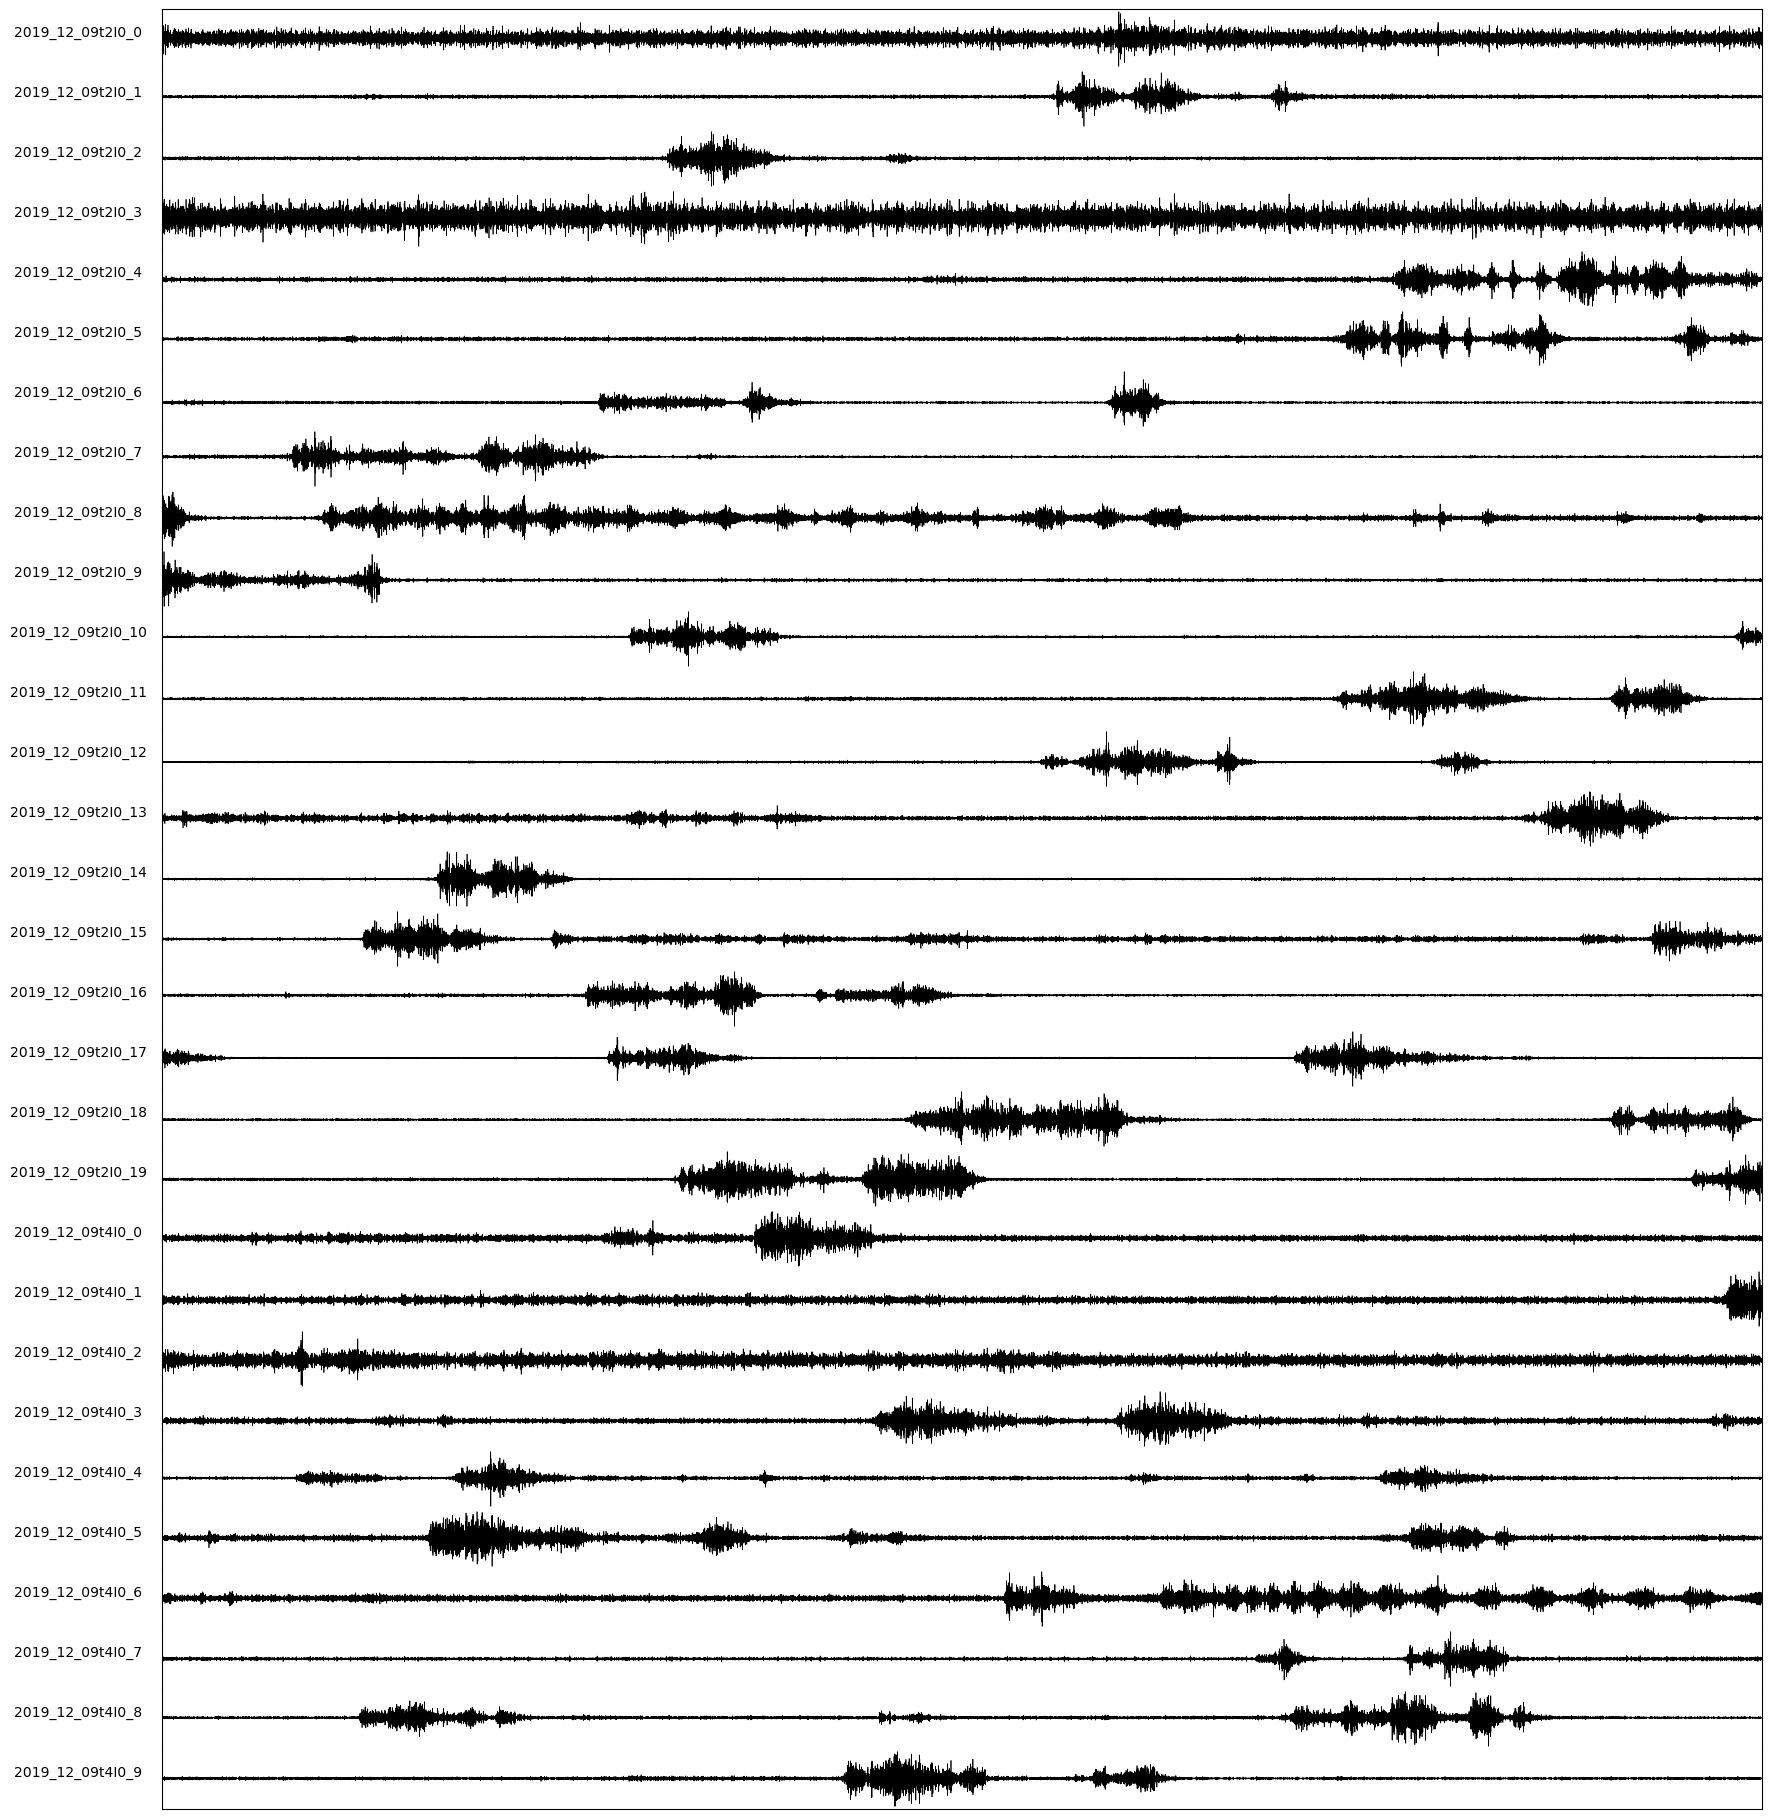

In [6]:
plot_channels(data = raw.get_data().T, time = raw.times, channels = channels, limit = None)

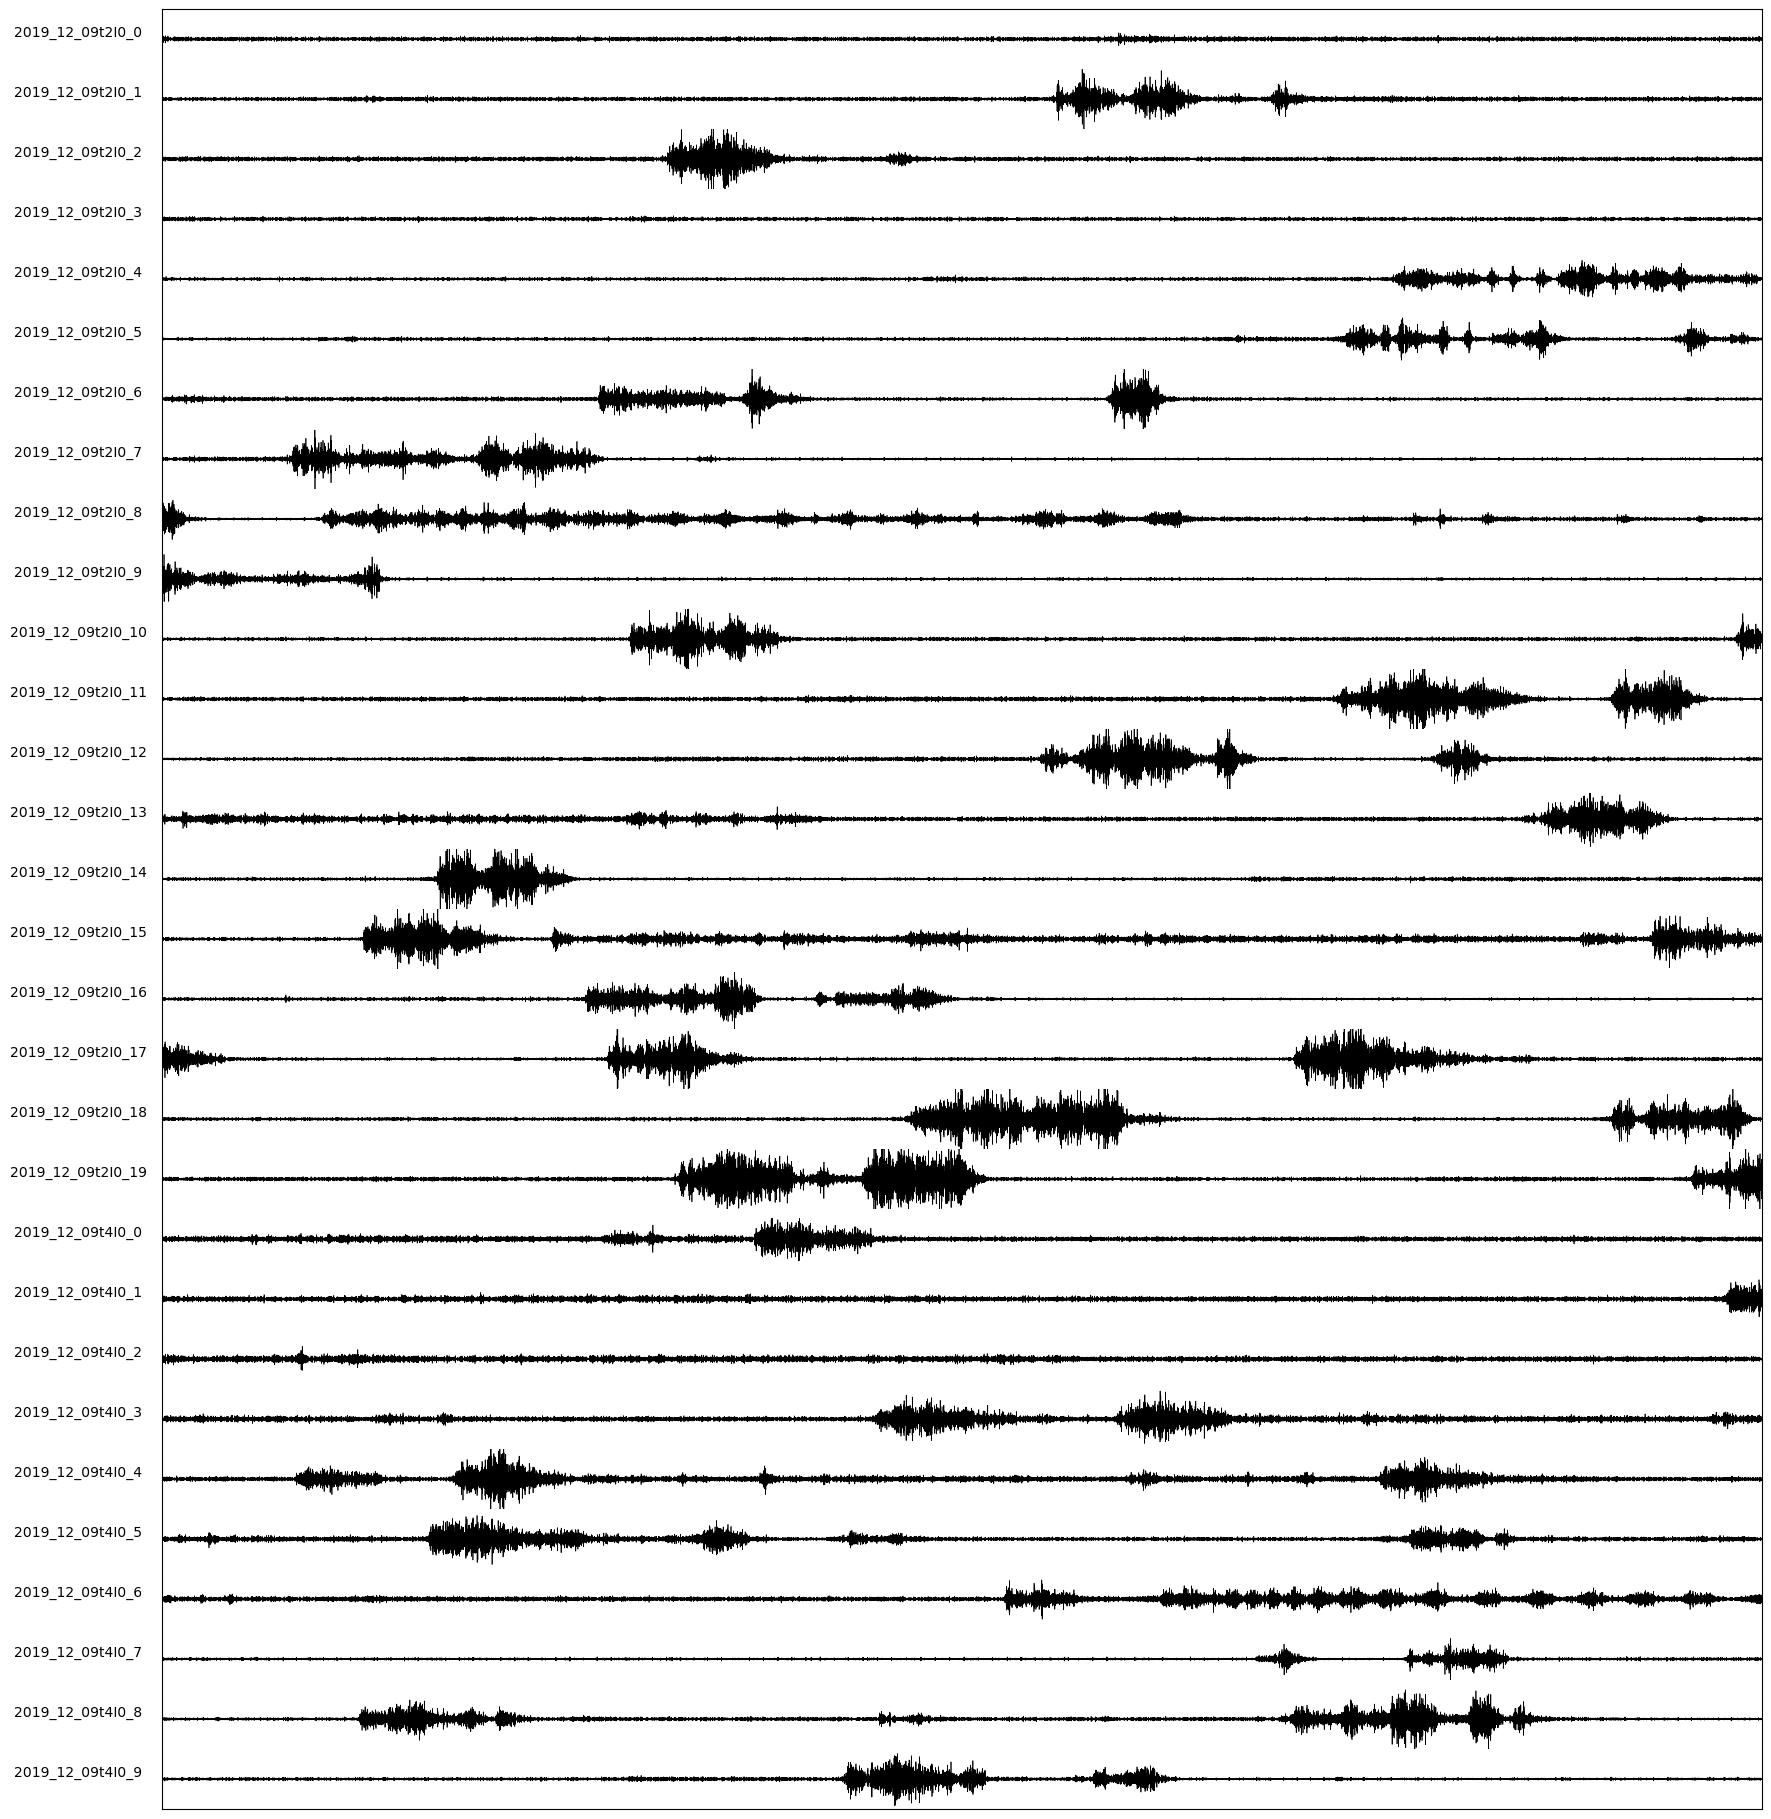

In [7]:
plot_channels(data = raw.get_data().T, time = raw.times, channels = channels, limit = 3)

## Scaling the channels

While the non-scaled data is quite good too, scaling is needed to ensure that different samples are comparable.

In [8]:
data = raw.get_data().transpose()
mean = np.mean(data)
std = np.std(data)
data = (data - mean) / std
raw._data = data.transpose()

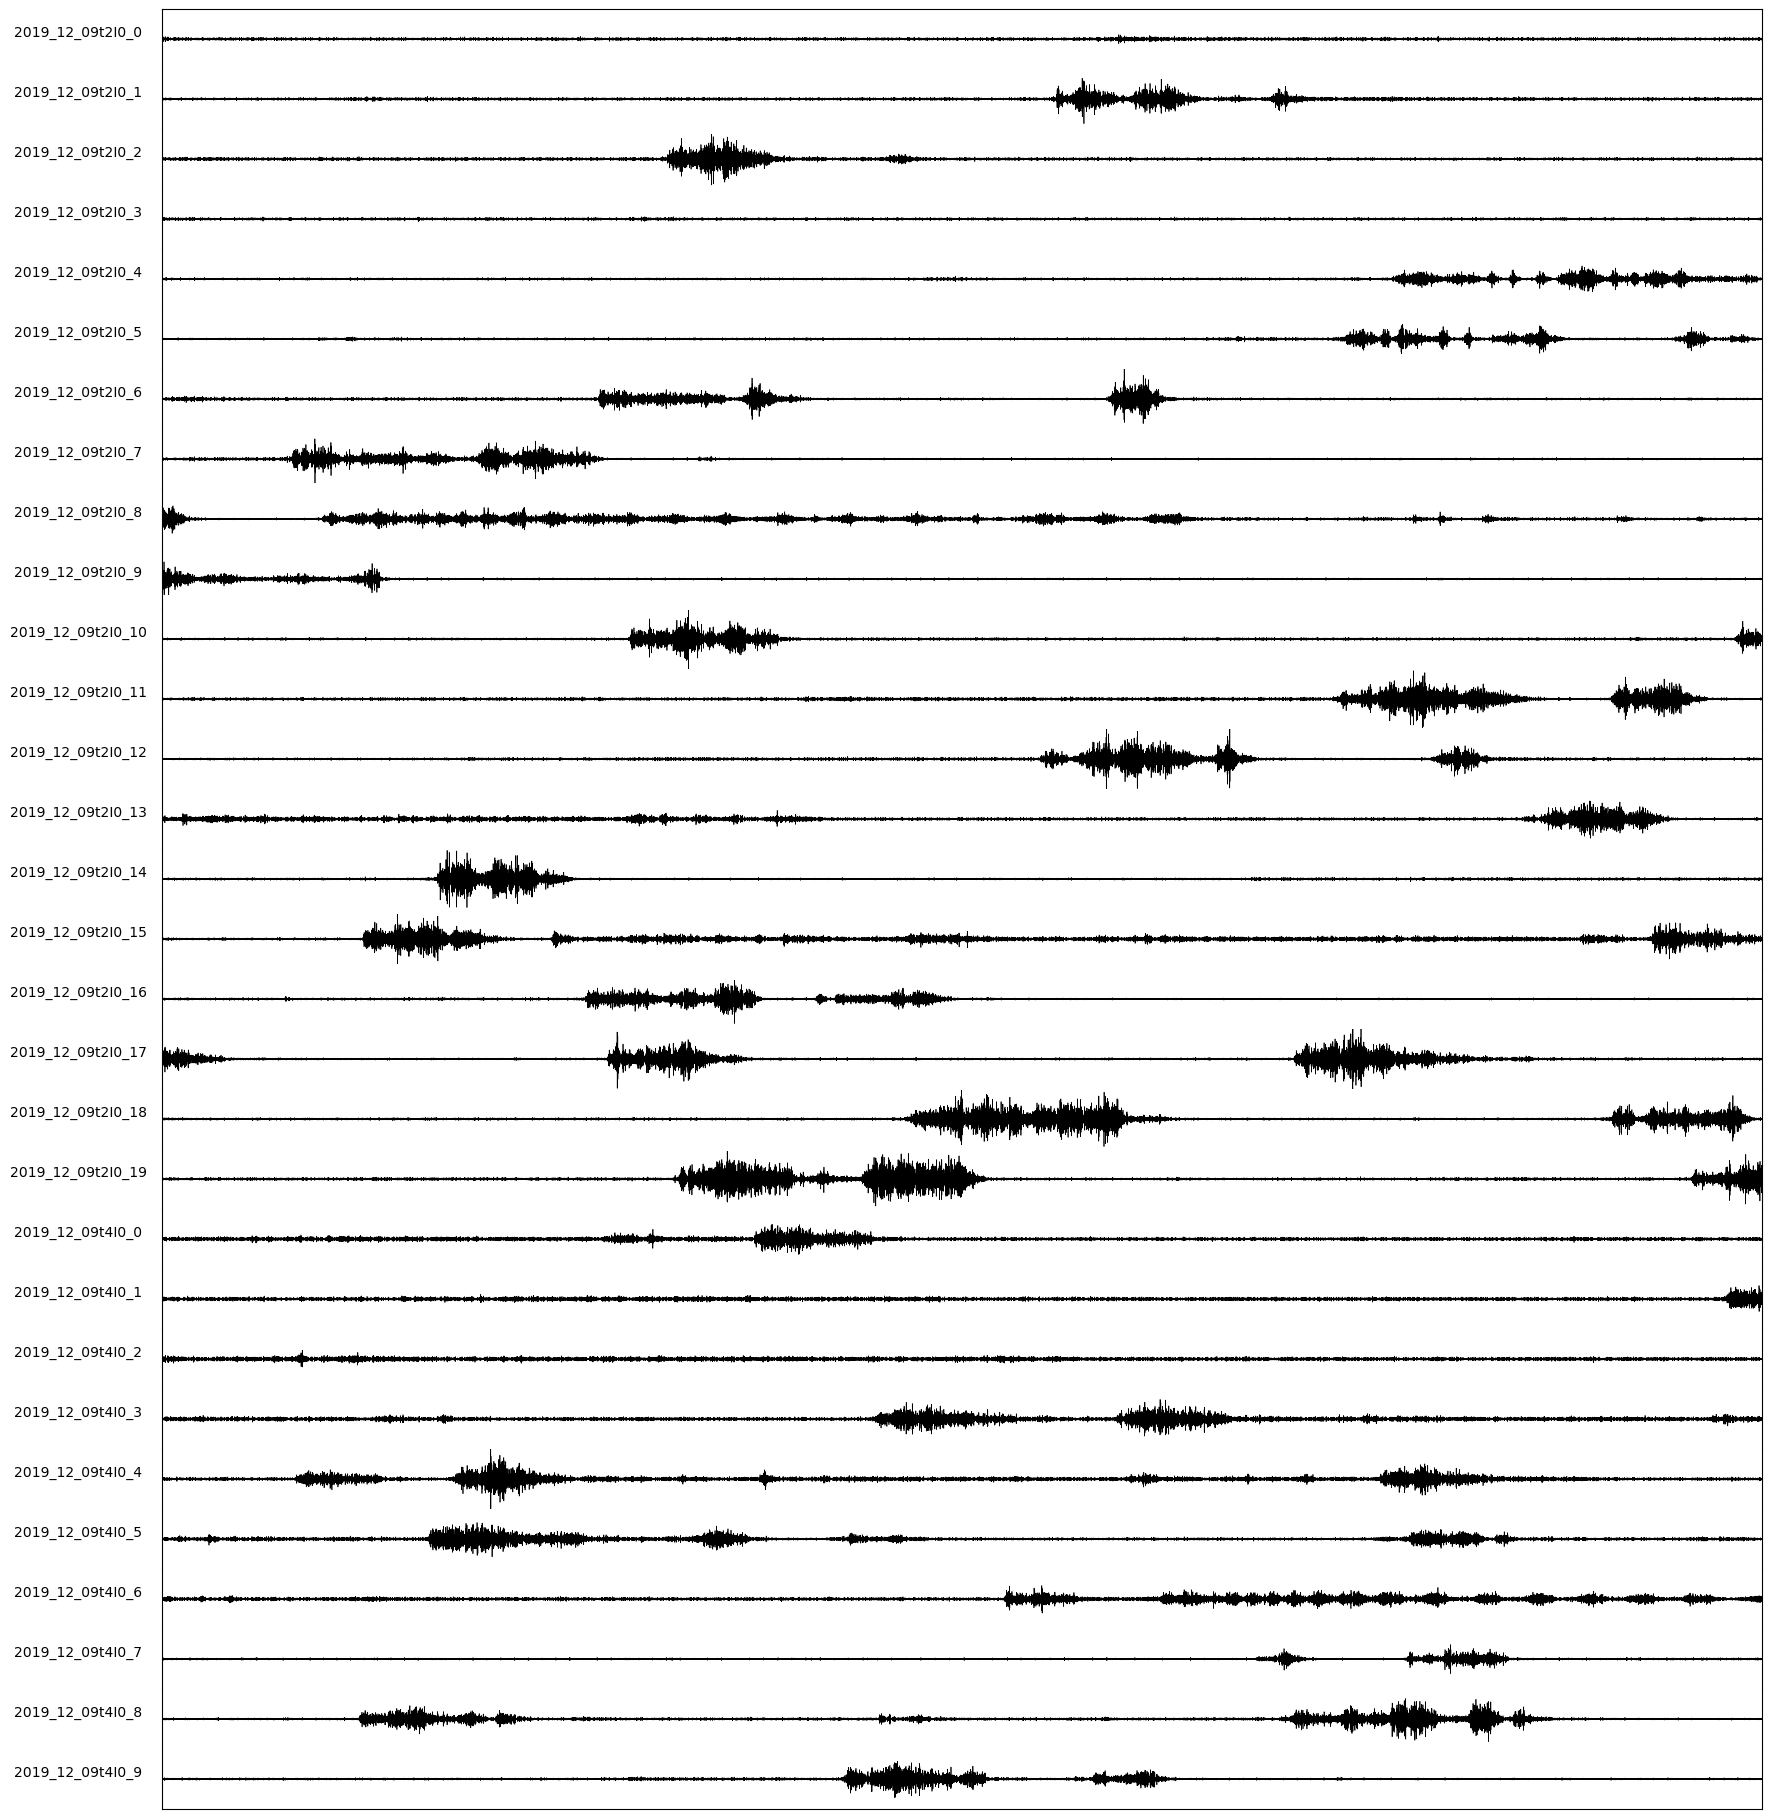

In [9]:
plot_channels(data = raw.get_data().T, time = raw.times, channels = channels, limit = 20)